In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pupil-apriltags 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyyaml

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 7.8 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 11.6 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB ? eta 0:00:00
     ---------------------------------------- 54.9/54.9 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


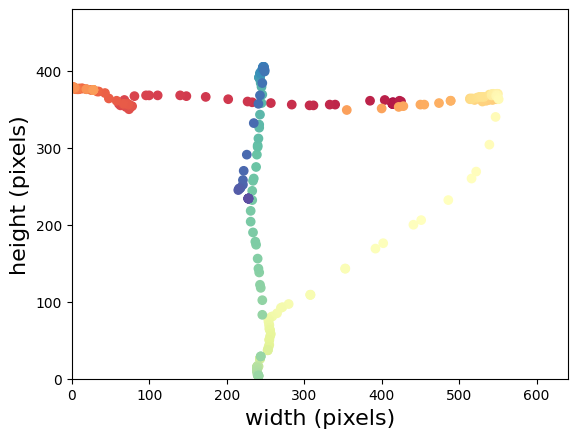

In [75]:
import cv2
import os
from pupil_apriltags import Detector
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

cap = cv2.VideoCapture(0) # webcam reference
i = 0
x_vals = []
y_vals = []

# Check if opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while (cap.isOpened()):
    ret, frame = cap.read() # ret = bool for capture success, if success is stored in frame
    frame = cv2.resize(frame, None, fx=1, fy=1, interpolation=cv2.INTER_AREA)
    # frame is each image from webcam

    gray_img = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
   
    # initialize detector
    at_detector = Detector(
        families="tag36h11",
        nthreads=1,
        quad_decimate=1.0,
        quad_sigma=0.0,
        refine_edges=1,
        decode_sharpening=0.25,
        debug=0
    )

# tags = at_detector.detect(gray_img, estimate_tag_pose=True, camera_params=(fx, fy, cx, cy), tag_size=tag_size)
# for tag in tags:
#     pose_r = tag.pose_R
#     pose_t = tag.pose_t
#     homography = tag.homography
    
    tags = at_detector.detect(gray_img)
    for tag in tags:
#         print(int(tag.center[0]),int(tag.center[1]))
        detected_img = cv2.circle(gray_img, (int(tag.center[0]),int(tag.center[1])), radius=5, color=(200,200,200), thickness=2)
        for corner in tag.corners:
            detected_img = cv2.circle(gray_img, (int(corner[0]), int(corner[1])),radius=5, color=(0,255,0), thickness=2)
            
#     print center for troubleshootings
    x_vals.append(int(corner[0]))
    y_vals.append(int(corner[1]))
    
#     for troubleshooting display on laptop    
    if type(detected_img) == numpy.ndarray:
        cv2.imshow("Filtered: Ecs to exit", detected_img)
        save_img = detected_img
    else:
        cv2.imshow("Filtered: Ecs to exit", frame)
        save_img = frame
    detected_img = frame; # reset img definition
    
    c = cv2.waitKey(1) # display popup window
    if c == 27: # until escape is pressed
        break
        
    # writes to folder on desktop, rename as required 
    cv2.imwrite(os.path.join("C:\\Users\\catwh\\Desktop\\Capstone_Images",'Frame'+str(i)+'.jpg'), save_img) 
    i += 1
    
cap.release()
cv2.destroyAllWindows()

t = np.arange(len(x_vals)) # color gradient
plt.scatter(x_vals, y_vals, c=t, cmap='Spectral')
plt.xlim(0, 640) # from reading pixel dimentions of one image 
plt.ylim(0, 480)
plt.xlabel("width (pixels)", fontsize = 16)
plt.ylabel("height (pixels)", fontsize = 16)

plt.show()

In [76]:
from platform import python_version
print(python_version())
# 3.7.16 works for pupil apriltag library

3.7.16


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
